# Projet python M1 MIND HMMA 238
    
       Yani Bouaffad et Samuel Kaci
       26 mai 2019
 
 

## Exercice 1 : Le jeu de la vie

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Nous importons utils.py qui possède l’ensemble des fonctions dont nous aurons besoin dans la suite de ce devoir 

In [15]:
run ./utils.py

Ici nous appliquons la fonction calcul_nb_voisins à la liste de liste Z définie comme suit :

In [16]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

In [17]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
Z_copy = np.copy(Z)


In [20]:
iteration_jeu(Z_copy)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [21]:
Z_copy = np.copy(Z)

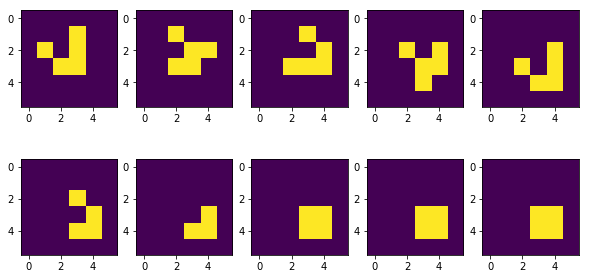

In [22]:
plt.figure(figsize=(10,5))

for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np.array(Z_copy))    
    iteration_jeu(Z_copy)

In [23]:
import time

In [24]:
# Calcul avec la compilation intégré
start = time.time()
iteration_jeu_jit(np.array(Z))
end = time.time()
print("Le temps de calcul avec la compilation est de : %s" % (end - start))

Le temps de calcul avec la compilation est de : 1.2960591316223145


In [26]:
start = time.time()
iteration_jeu(np.array(Z))
end = time.time()
print("Le temps de calcul avec la compilation est de : %s" % (end - start))

Le temps de calcul avec la compilation est de : 0.0002951622009277344


In [27]:
start = time.time()
calcul_nb_voisins_jit(np.array(Z))
end = time.time()
print("Le temps de calcul avec la compilation est de : %s" % (end - start))

Le temps de calcul avec la compilation est de : 0.00013494491577148438


In [29]:
start = time.time()
calcul_nb_voisins(np.array(Z))
end = time.time()
print("Le temps de calcul avec la compilation est de : %s" % (end - start))

Le temps de calcul avec la compilation est de : 0.00015473365783691406


Ici nous allons créer un widget permettant de contrôler le nombre d’itération que nous souhaitons afficher (compris entre 1 et 30)
 

In [11]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

In [12]:
def iteration(nb_iter):
    plt.figure(figsize=(25,20))
    Zbis = np.copy(Z_np)
    for i in range(nb_iter):
        plt.subplot(math.ceil(nb_iter/5),5,i+1)
        plt.imshow(np.array(Zbis))
        Zbis = iteration_jeu(Zbis)

In [13]:
from ipywidgets import interact, fixed

interact(iteration, nb_iter=(1, 30, 1));

interactive(children=(IntSlider(value=15, description='nb_iter', max=30, min=1), Output()), _dom_classes=('wid…

## Exercice : 2 Régression logistique

Dans un premier temps nous allons importer le jeu de données MNIST car nous en avons besoin pour la suite de ce devoir .

In [15]:
from sklearn.datasets import fetch_mldata

In [16]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

70000

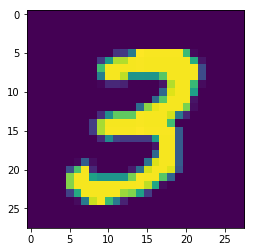

In [17]:
mask_3 = np.array(y==3)
mask_7 = np.array(y==7)
mask = mask_3+mask_7 
X_bis = X[mask]
y_bis = y[mask]

plt.imshow((X_bis[0]).reshape(28,28))
len(X[mask_3])
len(X)

14434

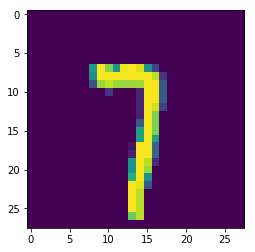

In [18]:
plt.imshow((X_bis[7141]).reshape(28,28))
len(X_bis)

Ici nous allons faire la régression sur la matrice X_bis et le vecteur y_bis, afin d’avoir le vecteur des coefficients w.

In [19]:
from sklearn import linear_model
skl_linmod = linear_model.LogisticRegression(fit_intercept=False)

In [20]:
skl_linmod.fit(X_bis,y_bis)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
from ipywidgets import interact, fixed

In [22]:
interact(fig_digit,  x=fixed(X_bis[700]), w=fixed(skl_linmod.coef_.T), alpha=(0.1, 100, 0.1));

interactive(children=(FloatSlider(value=50.00000000000001, description='alpha', min=0.1), Output()), _dom_clas…

Création du film :

In [32]:
import matplotlib.animation as animation

from matplotlib import rc
from IPython.display import HTML

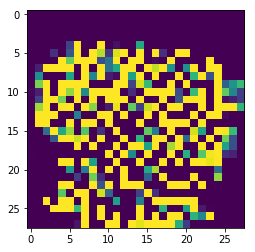

In [33]:
w= skl_linmod.coef_.T
x= X_bis[700]

fig = plt.figure()

def fig_anim(x, w, i):
    return((x.reshape(784,1)-i/np.linalg.norm(w)**2 * np.dot(w.T,x) * w).reshape(28,28))
    
im = plt.imshow(fig_anim(x,w,0).reshape(28,28), animated=True)

def animate(alpha):
    xmod = fig_anim(x,w,alpha)
    im.set_array(xmod)
    return im,

anim = animation.FuncAnimation(fig, animate, frames=200, blit=True, interval= 0.1)

anim.save('film.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

plt.show()


In [34]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="film.mp4" type="video/mp4">
</video>
</div>
""")

Ici nous faisons l'ACP à deux dimension de notre jeu de données.

Module created for script run in IPython


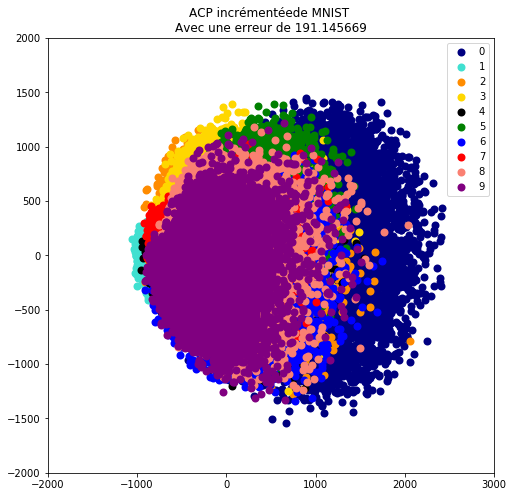

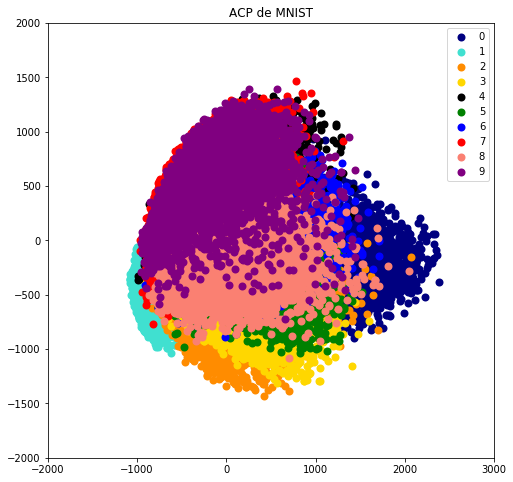

In [31]:
print(__doc__)

mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange', 'gold', 'black', 'green', 'blue', 'red', 'salmon', 'purple']
label = np.array(['0','1','2','3','4','5','6','7','8','9'])

for X_transformed, title in [(X_ipca, "ACP incrémentée"), (X_pca, "ACP")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], color=color, lw=2, label=target_name)

    if "ACP incrémentée" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + "de MNIST \nAvec une erreur de " "%.6f" % err)
    else:
        plt.title(title + " de MNIST")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-2000, 3000, -2000, 2000])

plt.show()